In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/my_studying/dataset.zip'

In [ ]:
import zipfile
import os
extract_folder = '/content/drive/MyDrive/my_studying/extracted_files'
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_folder)
for root, dirs, files in os.walk(extract_folder):
  for file in files:
    print(os.path.join(root, file))

/content/drive/MyDrive/my_studying/extracted_files/13. Final project/countries.csv
/content/drive/MyDrive/my_studying/extracted_files/13. Final project/products.csv
/content/drive/MyDrive/my_studying/extracted_files/13. Final project/events.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd "/content/drive/MyDrive/my_studying/extracted_files/13. Final project/"
df1 = pd.read_csv('countries.csv')
df2 = pd.read_csv('products.csv')
df3 = pd.read_csv('events.csv')

/content/drive/MyDrive/my_studying/extracted_files/13. Final project


In [ ]:
print(df1['alpha-3'].dtype)
print(df3['Country Code'].dtype)
print(df1['alpha-3'].str.contains(' ').sum)
print(df3['Country Code'].str.contains(' ').sum)

object
object
<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: alpha-3, Length: 249, dtype: bool>
<bound method Series.sum of 0       False
1       False
2         NaN
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Name: Country Code, Length: 1330, dtype: object>


In [ ]:
df1.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
df2.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
df3.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
df1.shape

(249, 5)

In [ ]:
df2.shape

(12, 2)

In [ ]:
df3.shape

(1330, 10)

In [ ]:
df = pd.merge(df3, df2, left_on='Product ID', right_on='id', how='inner' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
 10  id              1330 non-null   int64  
 11  item_type       1330 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 124.8+ KB


In [ ]:
sales = pd.merge(df, df1, left_on='Country Code', right_on='alpha-3', how='left' )
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
 10  id              1330 non-null   int64  
 11  item_type       1330 non-null   object 
 12  name            1248 non-null   object 
 13  alpha-2         1248 non-null   object 
 14  alpha-3         1248 non-null   object 
 15  region          1248 non-null   object 
 16  sub-region      1248 non-null   object 
dtypes: float64(3), int64(3), object(1

In [ ]:
sales = sales.drop(columns=['alpha-3', 'id'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
 10  item_type       1330 non-null   object 
 11  name            1248 non-null   object 
 12  alpha-2         1248 non-null   object 
 13  region          1248 non-null   object 
 14  sub-region      1248 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 156.0+ KB


Так як в деяких колонках значення дублюються, я їх видалила.    
Колонка Country Code містить 1248 значень, відповідно всі колонки з третьої таблиці теж. Скоріше за все, для деяких рядків таблиці events просто не було відомостей про країни.    
Далі перевіряю як сприймаються порожні значення. Для колонок типу 'object' можливі значення NaN, '' (порожні), ' '(пробіли) або спецальні значення типу 'NULL'


In [ ]:
print(sales['Country Code'].isna().sum()) #NaN
print((sales['Country Code'] == '').sum()) #''
print((sales['Country Code'].str.strip() == '').sum()) #пробіли
print((sales['Country Code'] == 'NULL').sum()) #NULL

82
0
0
0


Якщо в 'Country Code' NaN, то перевіряємо чи в інших колонках теж.

In [ ]:
print(sales['name'].isna().sum()) #NaN
print(sales['alpha-2'].isna().sum()) #NaN
print(sales['region'].isna().sum()) #NaN
print(sales['sub-region'].isna().sum()) #NaN

82
82
82
82


In [ ]:
print(sales['Units Sold'].isna().sum()) #NaN

2


Отже бачимо, що рядків з відсутніми значеннями в колонках типу 'object' 82, їх видалення може суттєво вплинути на результати. Так само як заповнення модою чи попередніми/наступними значеннями спотворить результати аналітики. Тому в даній ситуації найдоцільншим вважаю заповнення рядком 'Unknown', що дозволить правильно групувати значення по колонках в яких не вистачає данних. А от рядки з відсутніми значеннями в колонці 'Units Sold', я вважаю можливим видалити без суттєвого впливу на результати аналізу.

In [ ]:
sales = sales.dropna(subset=['Units Sold'])
sales[['Country Code', 'name', 'alpha-2', 'region', 'sub-region']] = sales[['Country Code', 'name', 'alpha-2', 'region', 'sub-region']].fillna("Unknown")
#sales.info()

Виправляємо тип значень для дат

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])
#sales.info()

Досліди дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.

In [ ]:
sales = sales.apply(
    lambda col: col.str.lower()
    if col.dtypes == 'object'
    else col
    ) #Переводимо всі значення в нижній регістр, за умови, що тип колонки 'object'
sales = sales.apply(
    lambda col: col.str.strip()
    if col.dtypes == 'object'
    else col
    )#Видаляємо зайві пробіли
translation_map = str.maketrans({
    'а':'a', 'е':'e', 'о':'o', 'р':'p', 'с':'c', 'у':'y', 'х':'x'
    })
sales = sales.apply(
    lambda col: col.str.translate(translation_map)
    if col.dtypes == 'object'
    else col
    )#Переводимо  літери
duplicates = sales.duplicated()
print(duplicates.sum())

0


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.facecolor'] = 'black'
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 18
rcParams['axes.facecolor'] = 'black'
rcParams['axes.edgecolor'] = '#F0F3BD'
rcParams['axes.labelcolor'] = '#C69F89'
rcParams['axes.grid'] = True
rcParams['grid.color'] = 'gray'
rcParams['grid.linestyle'] = '--'
rcParams['grid.linewidth'] = 0.5
rcParams['xtick.color'] = '#F0F3BD'
rcParams['ytick.color'] = '#F0F3BD'
rcParams['text.color'] = '#F0F3BD'
rcParams['patch.edgecolor'] = 'black'
rcParams['patch.linewidth'] = 1.5
rcParams['axes.prop_cycle'] = plt.cycler(color=['#56CBF9','#772D8B', '#772D8B', '#A1EF8B', '#92D5E6', '#7FBEEB', '#D3F6DB', '#AFBED1', '#EAC5D8', '#DBD8F0'])


Досліди дані на наявність аномалій. Якщо є, спробуй зрозуміти причини.

In [ ]:
sales.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


#Kлючові метрики діяльності компанії

In [ ]:
#Додаю колонки
sales['revenue'] = sales['Unit Price'] * sales['Units Sold']
sales['cost'] = sales['Unit Cost'] * sales['Units Sold']
sales['profit'] = sales['revenue'] - sales['cost']

In [ ]:
#Імпортую plotly для об'єднання загальних метрик в одну візуалізацію
import plotly.graph_objects as go

#Обчислюю загальні метрики
total_countries = sales[sales['name'] !="unknown"]['name'].nunique()
total_orders = sales['Order ID'].nunique()
total_revenue = sales['revenue'].sum()
total_profit = sales['profit'].sum()
total_units_sold = sales['Units Sold'].sum()

metrics = {
    "Total Countries": total_countries,
    "Total Units Sold": total_units_sold,
    "Total Orders Count": total_orders,
    "Total Revenue": total_revenue,
    "Total Profit": total_profit,
}
#Створення фігури
fig = go.Figure()

for i, (metric, value) in enumerate(metrics.items()):

    fig.add_trace(go.Indicator(
        mode="number",
        value=value if isinstance(value, (int, float)) else None,
        number={"prefix": "$" if "Revenue" in metric or "Profit" in metric else ""},
        title={"text": metric},
        domain={'row': i // 2, 'column': i % 2}
    ))

    fig.update_layout(
    grid={'rows': 3, 'columns': 2, 'pattern': "independent"},
    template="plotly_dark",
    title="Company Key Metrics",
)

fig.show()

##Аналіз продажів в розрізі категорій товарів


In [ ]:

category_data = sales[['item_type', 'Units Sold', 'Order ID', 'revenue', 'cost', 'profit']] #Виокремлюю дані для подальшого групування і агрегації
sales_by_category = category_data.groupby('item_type').agg(
    units_sold=('Units Sold', 'sum'),
    revenue=('revenue', 'sum'),
    cost=('cost', 'sum'),
    profit=('profit', 'sum'),
    orders=('Order ID', 'nunique')
    ).reset_index().sort_values(by='orders') #Створюю окрему таблицю, де дані згруповані по категоріям товарів

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normalize_data(df): #Нормалізує числові колонки в дф за допомогою MinMaxScaler
    scaler = MinMaxScaler()
    normalized_df = df.copy()  # Створює копію оригінального дф
    for column in normalized_df.columns:
        if pd.api.types.is_numeric_dtype(normalized_df[column]): # Перевіряємо чи колонка числова (int або float)
            normalized_df[column] = scaler.fit_transform(normalized_df[[column]])# Нормалізуємо колонку і замінюємо її в дф
    return normalized_df

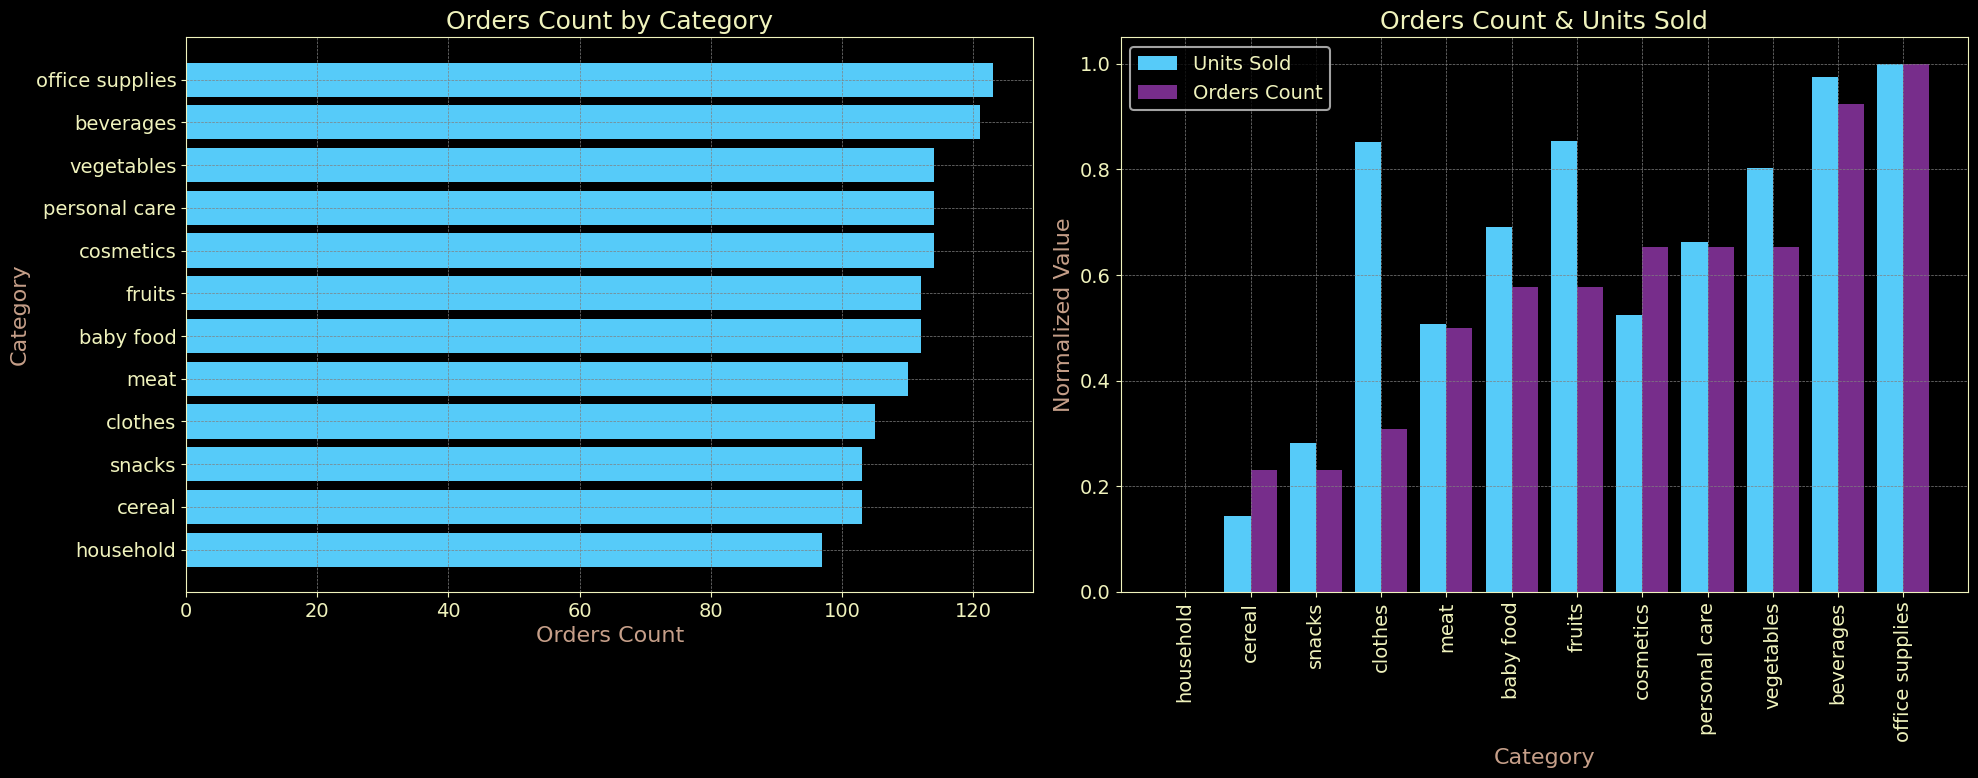

In [ ]:
category_data_norm = normalize_data(sales_by_category)#нормалізую дані
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Створюємо субплот із двох графіків
# Графік 1 популярність категорій (за ордерами)
axes[0].barh(sales_by_category['item_type'], sales_by_category['orders'])
axes[0].set_title('Orders Count by Category')
axes[0].set_xlabel('Orders Count')
axes[0].set_ylabel('Category')
# Графік 2 співвідношення кількості замовлень і кількості проданих одиниць
x = np.arange(len(category_data_norm['item_type']))  # Позиції категорій по осі X
width = 0.4
axes[1].bar(x - width/2, category_data_norm['units_sold'], width, label='Units Sold', color='#56CBF9')
axes[1].bar(x + width/2, category_data_norm['orders'], width, label='Orders Count', color='#772D8B')
axes[1].legend()
axes[1].set_title('Orders Count & Units Sold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Normalized Value')
axes[1].set_xticks(x)
axes[1].set_xticklabels(category_data_norm['item_type'], rotation=90)

plt.tight_layout()
plt.show()

**Графік 1**    
демонструє популярність категорій за кількістю замовлень    

_Найбільша кількість замовлень_ припадає на категорії "Офісні припаси", "Напої" та "Овочі". Це свідчить про високий попит на товари цих категорій.    

_Найменша кількість замовлень_ спостерігається в категоріях "Домашнє господарство" та "Зернові". Можливо, це пов'язано з меншим асортиментом товарів в цих категоріях або меншим попитом серед клієнтів.    
**Графік 2**    
використані нормалзовані дані, щоб продемонструвати саме співвідношення кількості замовлень та кількості проданих одиниць.    

Категорії "Офісні припаси" та "Косметика" демонструють _високу ефективність_, оскільки кількість проданих одиниць товару відносно кількості замовлень в цих категоріях є найбільшою. Це може свідчити про те, що клієнти в цих категоріях купують більші обсяги товару за одне замовлення.    
Категорії "Зернові" та "Напої" мають _найнижчу ефективність_. Це може бути пов'язано з тим, що клієнти в цих категоріях купують менші обсяги товару за одне замовлення.

In [ ]:
""" Функція написана попередньо для нормалізації даних тут не підійшла оскільки вона номалізує дані в колонці
не злежно від інших колонок. Так як співвідношення не зберігається профіт ставав більше ревеню"""
max_revenue = sales_by_category['revenue'].max()
sales_by_category['revenue_norm'] = sales_by_category['revenue'] / max_revenue # Тому нормалізуємо необхідні значення відносно максимального ревеню
sales_by_category['profit_norm'] = sales_by_category['profit'] / max_revenue

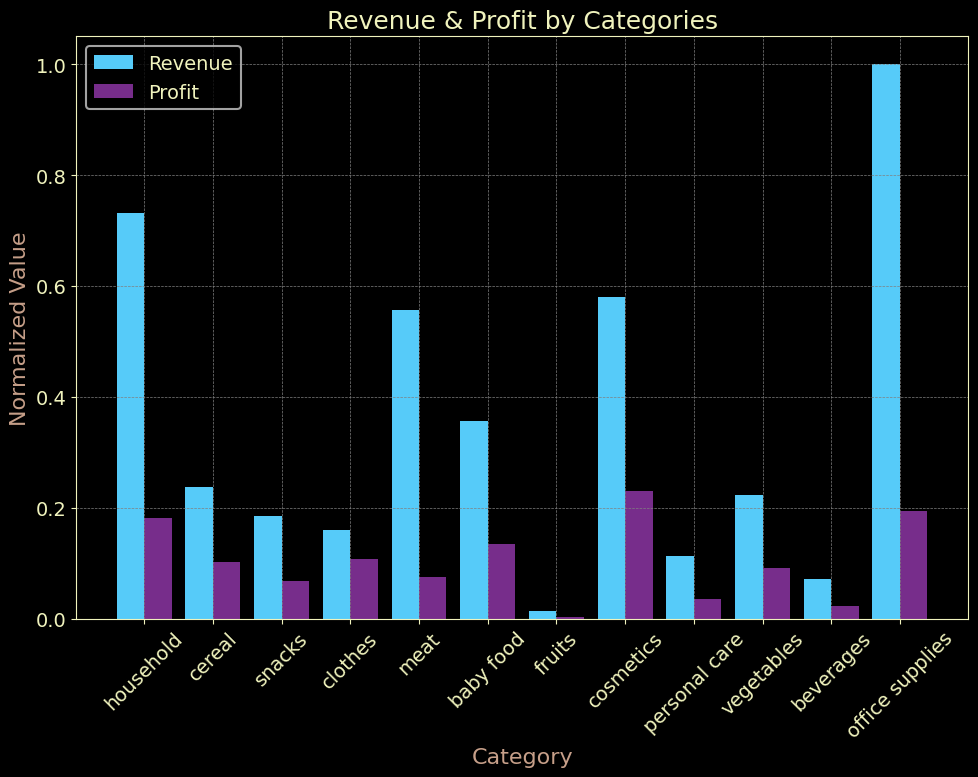

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(len(sales_by_category['item_type']))  # Позиції категорій по осі X
width = 0.4
ax.bar(x - width/2, sales_by_category['revenue_norm'], width, label='Revenue', color='#56CBF9')
ax.bar(x + width/2, sales_by_category['profit_norm'], width, label='Profit', color='#772D8B')
ax.legend()
ax.set_title('Revenue & Profit by Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Normalized Value')
ax.set_xticks(x)
ax.set_xticklabels(sales_by_category['item_type'], rotation=45)

plt.tight_layout()
plt.show()

**Графік**    
 демонструє нам співвідношення доходів і прибутків в різних категоріях товарів.
    
_Найбільший дохід_ приносять категорії "Офісні припаси" та "Домашнє господарство". Вони займають найбільшу частку в загальному доході.    
Хоча "Офісні припаси" приносять найбільший дохід, _найбільший прибуток_ припадає на категорію "Косметика". Це може свідчити про високу маржинальність цієї категорії.     
Категорії "Зернові" та "Напої" мають відносно _низьку маржинальність_, оскільки різниця між доходом та прибутком в цих категоріях невелика.    
Загалом, розподіл доходу та прибутку між категоріями виглядає _досить стабільним_. Немає категорій, які б різко виділялися або мали значні відхилення від середнього значення.

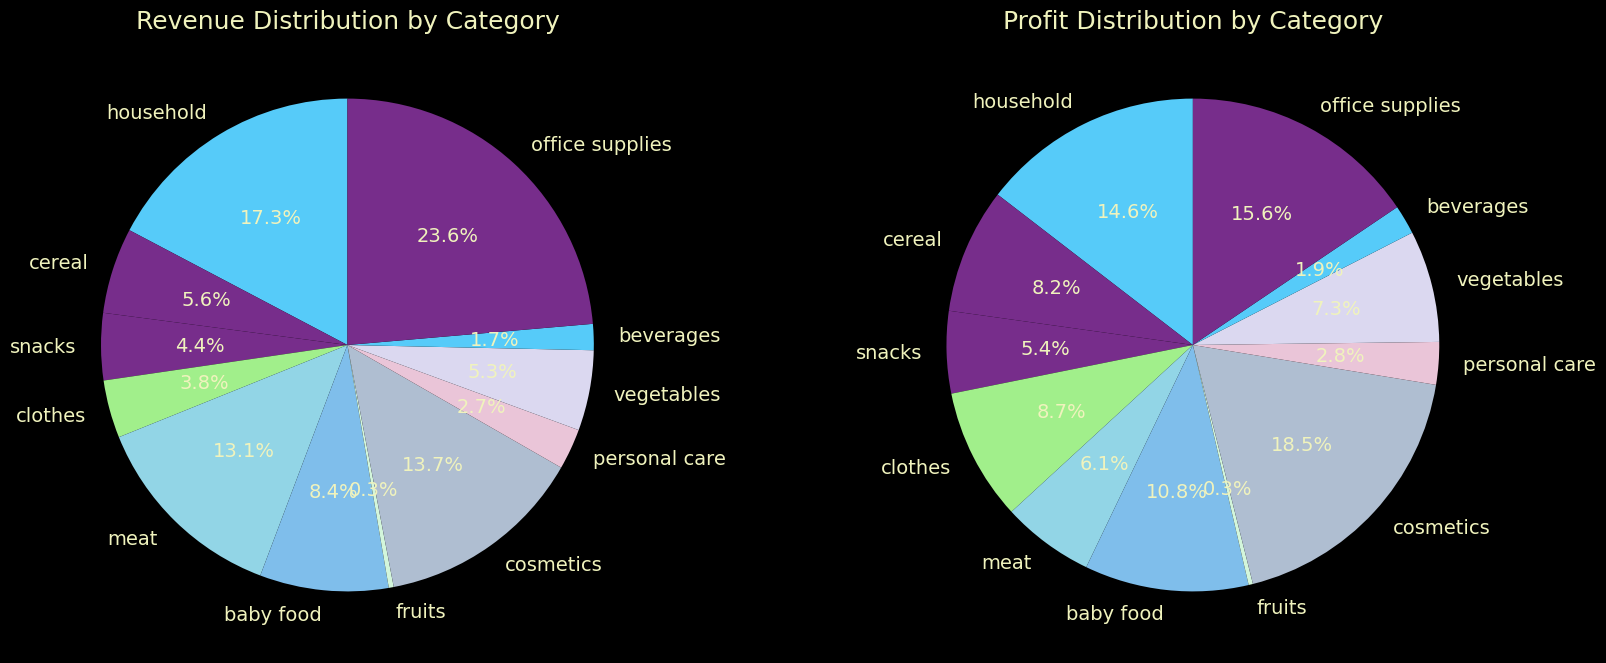

In [ ]:
#Дохідність та прибутковість в частках від загального
#plt.figure(figsize=(8, 8))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].pie(sales_by_category['revenue'], labels=sales_by_category['item_type'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Revenue Distribution by Category')
axes[1].pie(sales_by_category['profit'], labels=sales_by_category['item_type'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Profit Distribution by Category')

plt.show()

Компанія представлена в широкому спектрі категорій, що свідчить про диверсифікацію бізнесу.   
_Найбільшу частку_ в загальному доході займають категорії "Офісні припаси" та "Домашнє господарство". Вони є основними драйверами зростання компанії.    
Хоча "Офісні припаси" приносять найбільший дохід, _найбільша частка прибутку_ припадає на категорію "Косметика". Це підтверджує про високу маржинальність цієї категорії.   
Категорії "Зернові" та "Напої" мають відносно _низьку маржинальність_, оскільки їхня частка в прибутку значно менша, ніж в доході.


##Аналіз продажів в розрізі географії продажів


In [ ]:
pivot_table = pd.pivot_table(sales, values=['revenue', 'cost', 'profit', 'Units Sold'], index=['name', 'region'], aggfunc='sum' ).reset_index().sort_values(by='revenue', ascending=False)
#pd.set_option('display.width', 1000)
#pd.set_option('display.max_columns', None)

In [ ]:
import matplotlib.ticker as mticker
formatter = mticker.FuncFormatter(lambda x, _:f'{x:,.0f}') #налаштовую відображення шкали щоб числа відображалися в звичайному форматі через кому
#Функції необхідні для того, щоб викликати їх тільки тоді, коли це потрібно
def format_y(ax): #функція приймає вісь 'y' проходиться по мітках на осі і повертає відформатовані мітки

    for ax in plt.gcf().get_axes():
        if isinstance(ax.get_ylim() [0], (int, float)): #Перевірка щоб мітки були тільки числами
            ax.yaxis.set_major_formatter(formatter)
def format_x(ax):
    for ax in plt.gcf().get_axes():
        if isinstance(ax.get_xlim() [0], (int, float)):
            ax.xaxis.set_major_formatter(formatter)


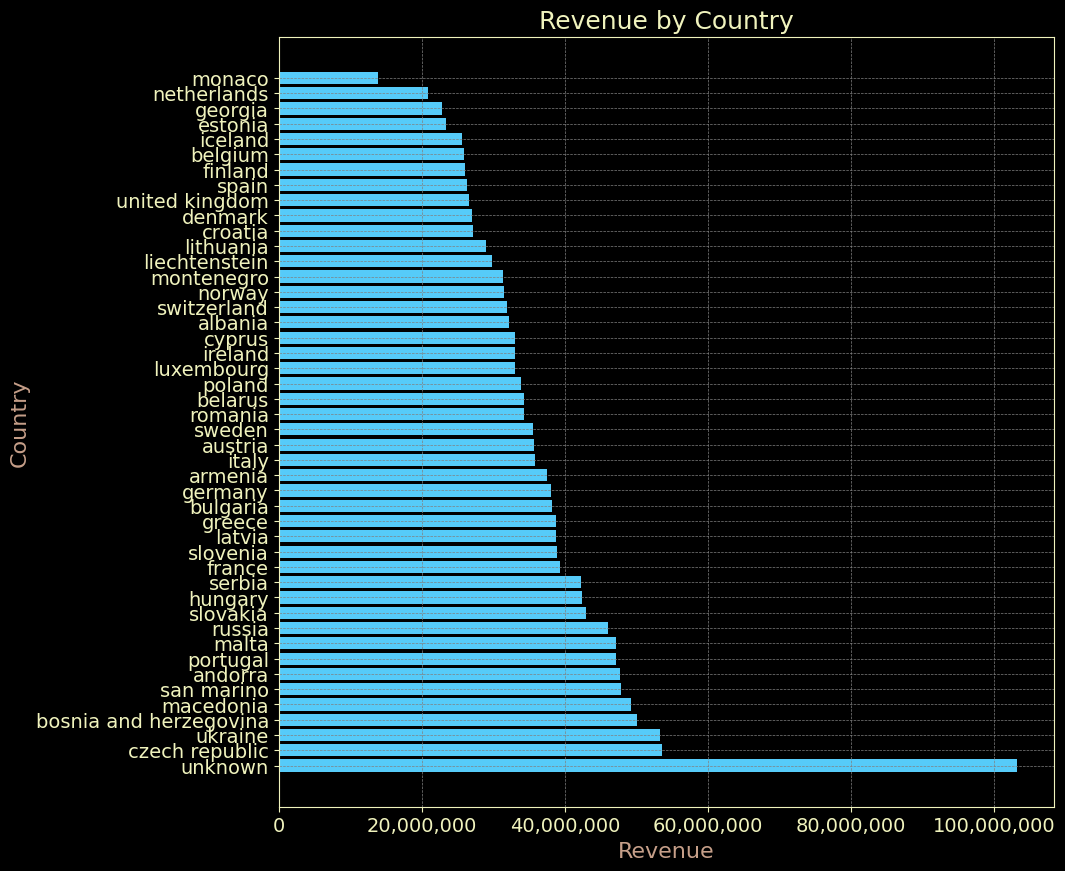

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(pivot_table['name'], pivot_table['revenue'])
ax.set_title('Revenue by Country')
ax.set_xlabel('Revenue')
ax.set_ylabel('Country')
format_x(ax)
plt.show()

**Графік** демонструє розподіл доходів за різними країнами. Країни розташовані за спаданням рівня доходів, від найвищих до найнижчих.    
Доходи розподілені по різних регіонах Європи та Азії.
Існують значні відмінності в рівнях доходів між країнами. Деякі країни мають доходи, які в кілька разів перевищують доходи інших.

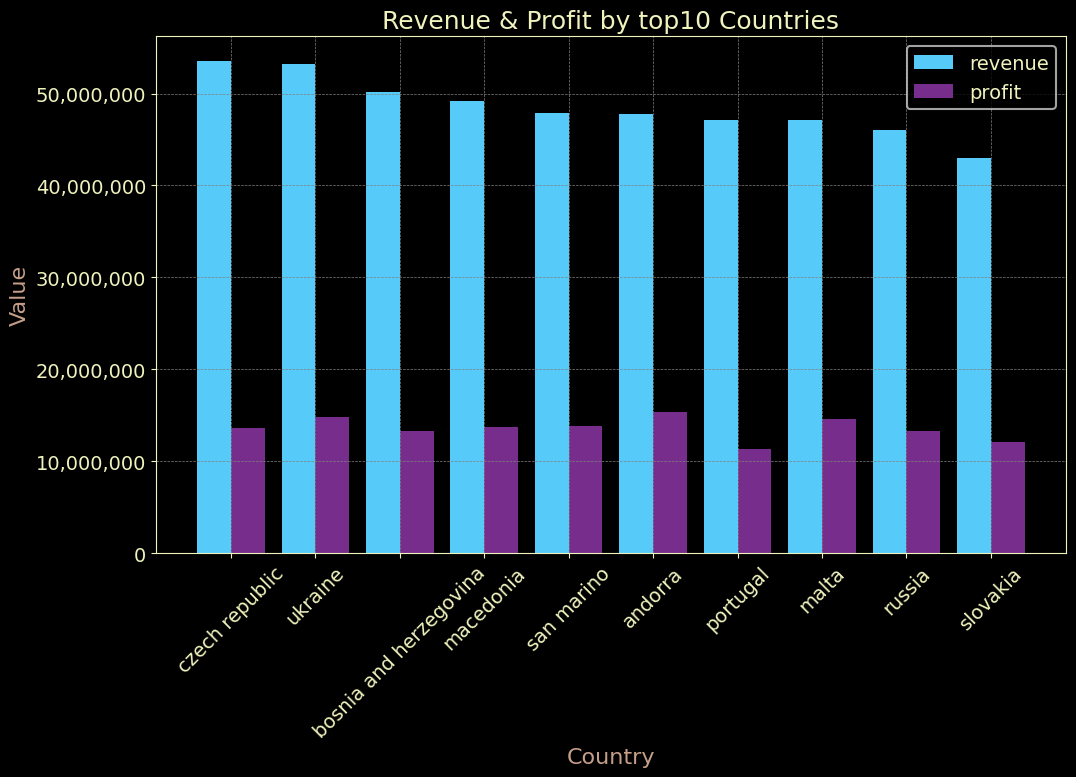

In [ ]:
filtered_pivot_table = pivot_table[(pivot_table['name'] != 'unknown') & (pivot_table['region'] != 'unknown')] #Відфльтровуємо дані
top10_countries = filtered_pivot_table.head(10) #Щоб графік був компактнший беремо до уваги тільки найдохідніші 10 країн
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(len(top10_countries['name']))
width = 0.4
ax.bar(x - width/2, top10_countries['revenue'], width, label='revenue', color='#56CBF9')
ax.bar(x + width/2, top10_countries['profit'], width, label='profit', color='#772D8B')
ax.legend()
ax.set_title('Revenue & Profit by top10 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_xticks(range(len(top10_countries['name'])))
ax.set_xticklabels(top10_countries['name'], rotation=45)
plt.tight_layout()
format_y(ax)
plt.show()



_Найбільший дохід_ приносять Чеська Республіка та Україна. Вони суттєво випереджають інші країни за цим показником.    
Серед топ-10 країн спостерігається відносно стабільний рівень доходів. Різниця між найвищим і найнижчим показником не надто велика.    
_Прибуток_ у всіх країнах є значно нижчим за дохід. Це може свідчити про високі витрати або низьку маржинальність продукції.Тому варто звернути увагу на _співвідношення доходу та прибутку_ в різних країнах. У деяких країнах прибуток становить значну частину доходу, що свідчить про високу ефективність діяльності. В інших країнах ця різниця менша, що може вказувати на _необхідність оптимізації витрат_.

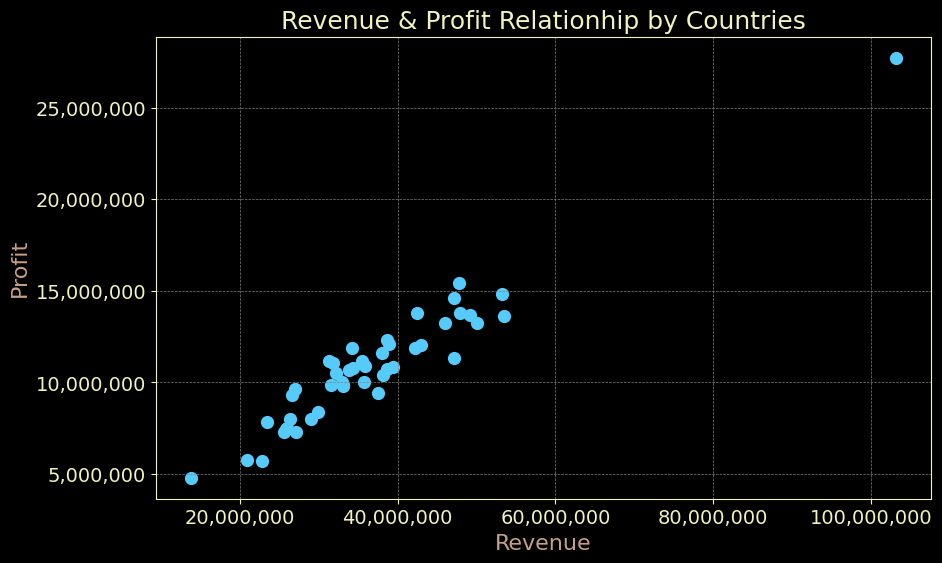

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(pivot_table['revenue'], pivot_table['profit'])
ax.set_title('Revenue & Profit Relationhip by Countries')
ax.set_xlabel('Revenue')
ax.set_ylabel('Profit')
format_x(ax)
format_y(ax)
plt.show()

**Графік** демонструє _позитивну кореляцію. Більшість точок на графіку розташовані вздовж лінії, що свідчить про пряму залежність між доходом та прибутком. Це логічно, оскільки прибуток є частиною доходу після вирахування всіх витрат.    
Точки на графіку розсіяні навколо лінії тренда, що вказує на наявність інших факторів, які впливають на прибуток крім доходу. Це можуть бути витрати на виробництво, маркетинг, різні податки тощо.
Також є кілька точок, які відхиляються від загальної тенденції. Це можуть бути країни з високими витратами на виробництво, низькою маржею прибутку або іншими особливостями.

##Аналіз продажів в розрізі каналів продажу


In [ ]:
sales_by_channel = pd.pivot_table(sales, values=['Units Sold', 'revenue', 'cost',], index='Sales Channel', aggfunc='sum' ).reset_index()
print(sales_by_channel)

  Sales Channel  Units Sold          cost       revenue
0       offline   3320363.0  6.182941e+08  8.717606e+08
1        online   3256161.0  5.824008e+08  8.303688e+08


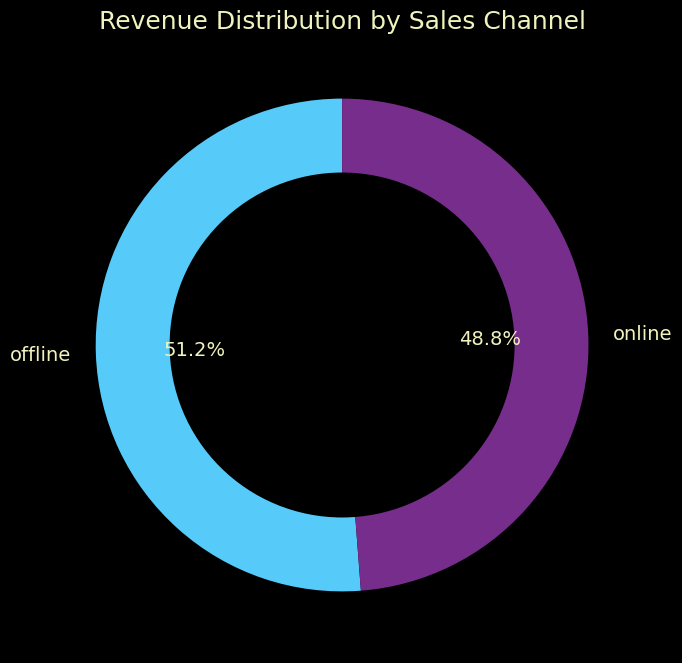

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sales_by_channel['revenue'], labels=sales_by_channel['Sales Channel'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Revenue Distribution by Sales Channel')
plt.show()

 Розподіл доходу між онлайн і офлайн каналами є досить збалансованим. Це дозволяє компанії знизити ризики, пов'язані з залежністю від одного каналу.

##Інтервал часу між замовленням та його відвантаженням  розрізі:

категорій товарів;
країн;
регіонів.

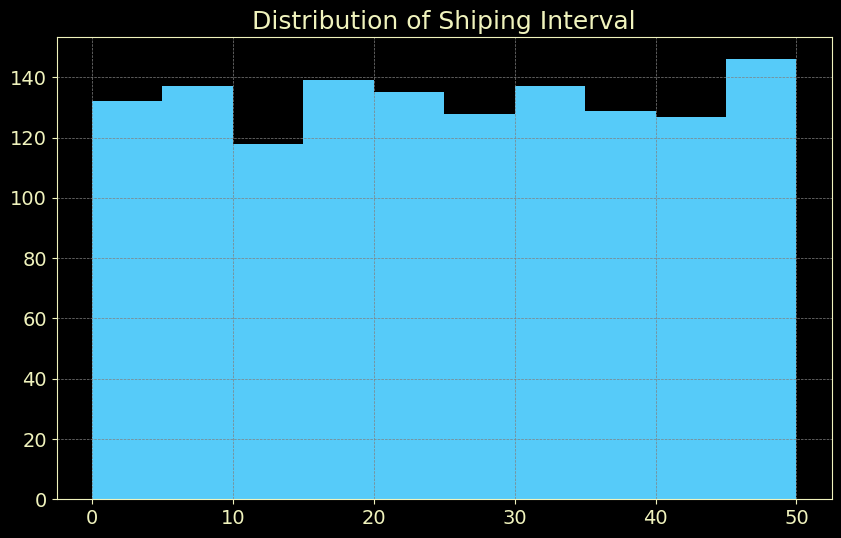

In [ ]:
sales['interval'] = abs(sales['Order Date'] - sales['Ship Date']).dt.days
plt.hist(sales['interval'], bins=10)
plt.title('Distribution of Shiping Interval')
plt.show()


Відсутність значних піків або провалів на гістограмі свідчить про те, що інтервали доставки розподілені досить рівномірно по всьому діапазону.
Стабільність процесу доставки: Такий розподіл може свідчити про стабільність процесу доставки і відсутність значних збоїв або затримок.    
Якщо б існувала сезонність в доставці (наприклад, піки перед святами), то ми б спостерігали відповідні піки на гістограмі. Відсутність таких піків свідчить про відсутність явної сезонності.

##Розподл інтервалу часу доставки по категоріях


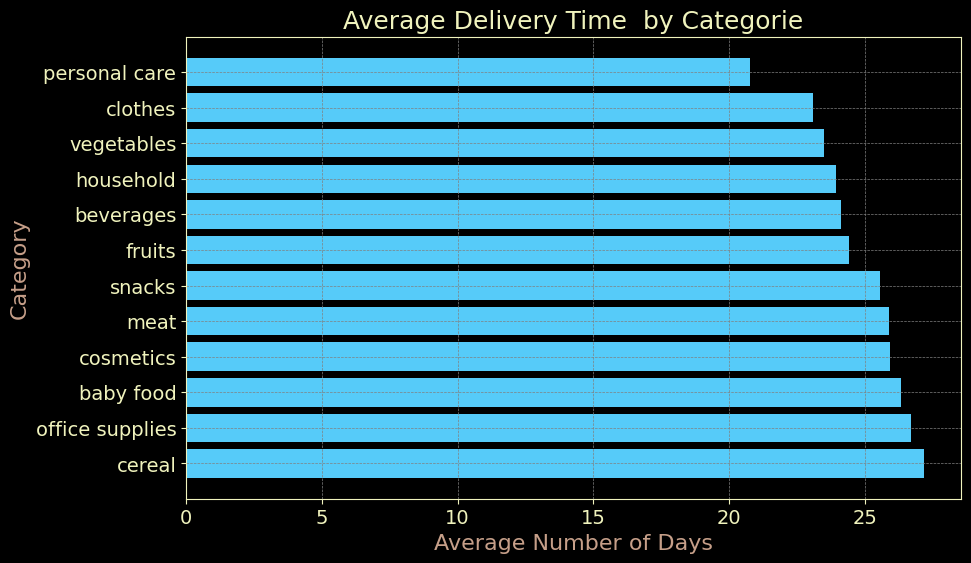

In [ ]:
shiping_by_category = sales.groupby('item_type')['interval'].mean().reset_index().sort_values(by='interval', ascending=False).reset_index()
plt.barh(shiping_by_category['item_type'], shiping_by_category['interval'])
plt.title('Average Delivery Time  by Categorie')
plt.xlabel("Average Number of Days")
plt.ylabel('Category')
plt.show()

##Розподіл інтервалу часу доставки по регіонах

In [ ]:
shiping_by_geo_filter = sales[(sales['name'] != 'unknown') & (sales['region'] != 'unknown')]

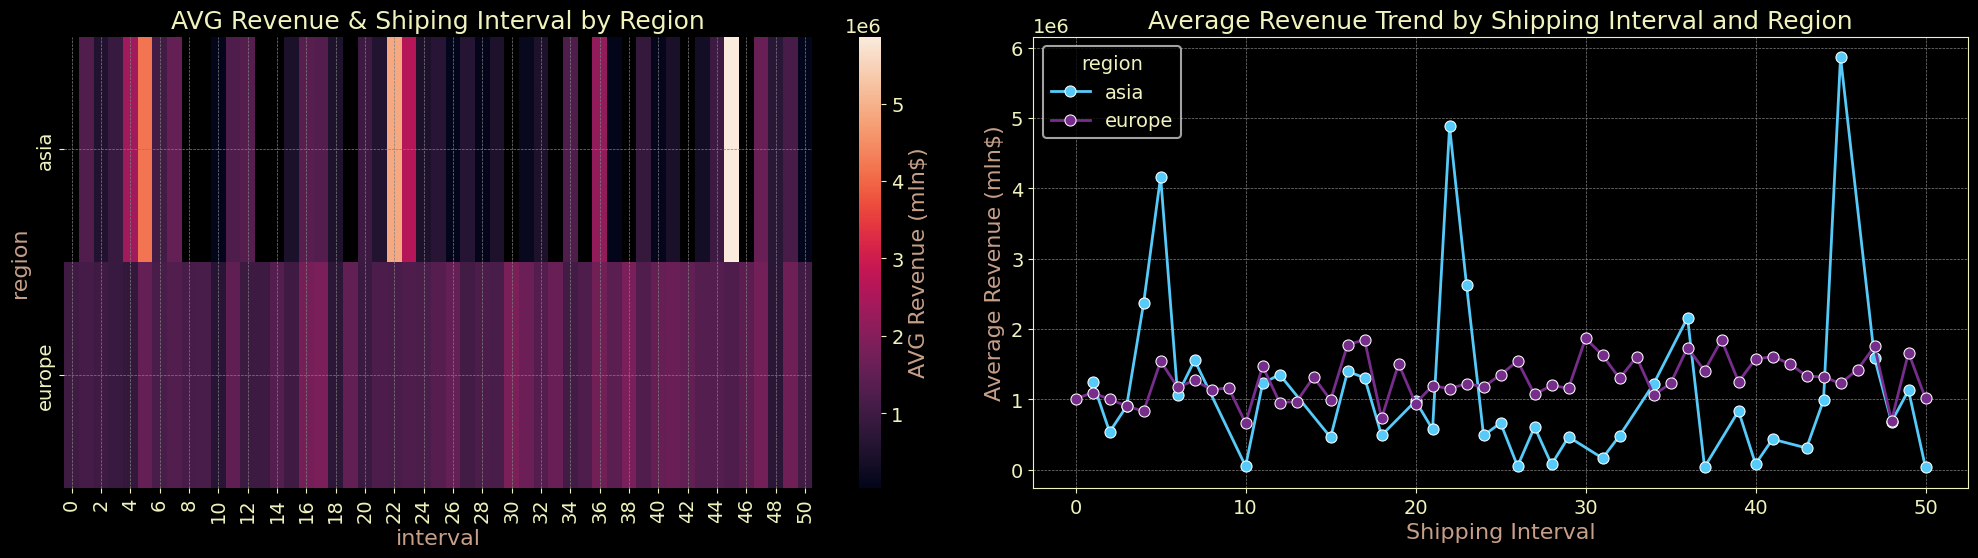

In [ ]:
ship_by_region = shiping_by_geo_filter.pivot_table(values='revenue', index='region', columns='interval')
ship_by_region_long = ship_by_region.stack().reset_index()
ship_by_region_long.columns = ['region', 'interval', 'revenue']
fig5, axes5 = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.heatmap(ship_by_region, vmin=None, vmax=None, cmap=None, center=None, robust=False,
            annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True,
            cbar_kws={'label': 'AVG Revenue (mln$)'} , cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto',
            mask=None, ax=axes5[0])
axes5[0].set_title('AVG Revenue & Shiping Interval by Region')
#ship_by_region_df = ship_by_region.reset_index()
sns.lineplot(data=ship_by_region_long, x='interval', y='revenue', hue='region', marker='o')
axes5[1].set_title('Average Revenue Trend by Shipping Interval and Region')
axes5[1].set_xlabel('Shipping Interval')
axes5[1].set_ylabel('Average Revenue (mln$)')
plt.tight_layout()
plt.show()

##Графік1    
в першій частині графіка (менші інтервали) спостерігається більше світлих смужок, особливо в Азії. Це може свідчити про те, що для коротких інтервалів доставки середній дохід вищий.    
Середній дохід в Азії та Європі суттєво відрізняється.    
Для обох регіонів спостерігається _значна варіація середнього доходу_ в залежності від інтервалу.     
Є кілька інтервалів, де спостерігаються _значно вищі або нижчі значення доходу_ порівняно з сусідніми інтервалами.   
Різниця в доходах між Азією та Європою може бути пов'язана з економічними особливостями цих регіонів.
##Графік2     
Дохід _суттєво коливається_ в залежності від інтервалу доставки як для Азії, так і для Європи. Це свідчить про те, що існує нелінійна залежність між цими двома показниками.    
Не спостерігається прямої пропорційності між збільшенням інтервалу доставки та зростанням доходу. Тобто, _більш тривалий інтервал доставки не завжди веде до більшого доходу_.    
Для Азії характерні _більш виражені піки доходів_ при певних інтервалах доставки, тоді як для Європи спостерігається _більш плавна динаміка_. Це може свідчити про відмінності в споживчих перевагах, логістичних системах або інших факторах, що впливають на дохід.
Аналіз графіка "Середній дохід за інтервалом доставки та регіоном"
Загальне враження:

Графік відображає динаміку середнього доходу в залежності від інтервалу доставки для двох регіонів: Азії та Європи.

Можливі пояснення:

Спеціальні пропозиції: Можливо, при певних інтервалах доставки компанія пропонує спеціальні пропозиції або знижки, що призводить до зростання продажів.
Сезонність: Піки доходів можуть бути пов'язані з сезонними коливаннями попиту на певні товари.
Логістичні обмеження: При певних інтервалах доставки можуть виникати логістичні обмеження, що впливають на вартість доставки і, як наслідок, на дохід.
Конкуренція: Рівень конкуренції на ринку може змінюватися в залежності від інтервалу доставки, що також впливає на дохід.

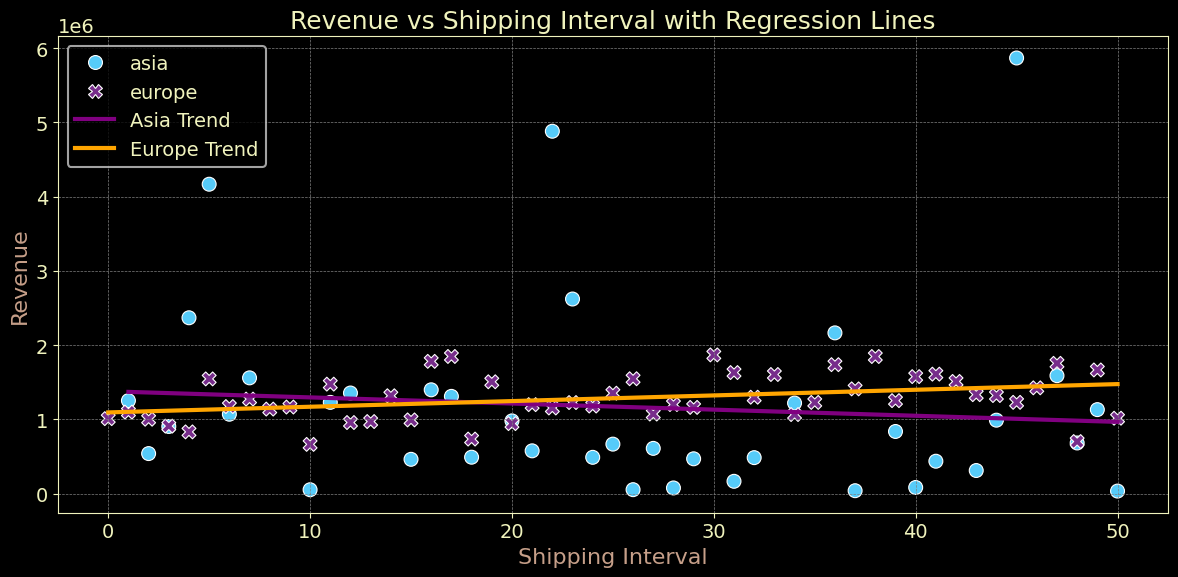

In [ ]:
fig6, ax6 = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=ship_by_region_long, x='interval', y='revenue', hue='region', style='region', s=100)
sns.regplot(data=ship_by_region_long[ship_by_region_long['region'] == 'asia'],
            x='interval', y='revenue', scatter=False, ci=None, label='Asia Trend', color='purple')
sns.regplot(data=ship_by_region_long[ship_by_region_long['region'] == 'europe'],
            x='interval', y='revenue', scatter=False, ci=None, label='Europe Trend', color='orange')

ax6.set_title('Revenue vs Shipping Interval with Regression Lines')
ax6.set_xlabel('Shipping Interval')
ax6.set_ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

_Негативний тренд_ — лінія регресії для Азії має спадний нахил.
Це вказує на те, що зі збільшенням терміну доставки (shipping interval) дохідність має тенденцію до зниження

_Позитивний тренд_ — лінія регресії для Європи має зростаючий нахил.
Це означає, що зі збільшенням терміну доставки дохідність має тенденцію до зростання.    
Для Азії коротші терміни доставки пов'язані з вищою дохідністю (можливо, через швидші та цінніші замовлення).    
Для Європи, навпаки, довші терміни доставки можуть бути пов'язані з більшими обсягами замовлень або іншим фактором, що забезпечує дохід.
Однак, взаємодія дуже слабка, оскільки обидві лінії майже горизонтальні.

##Розподіл інтервалу доставки по країнах

<ipython-input-99-f27de2fab73b>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ship_by_country_long = ship_by_country.stack().reset_index()


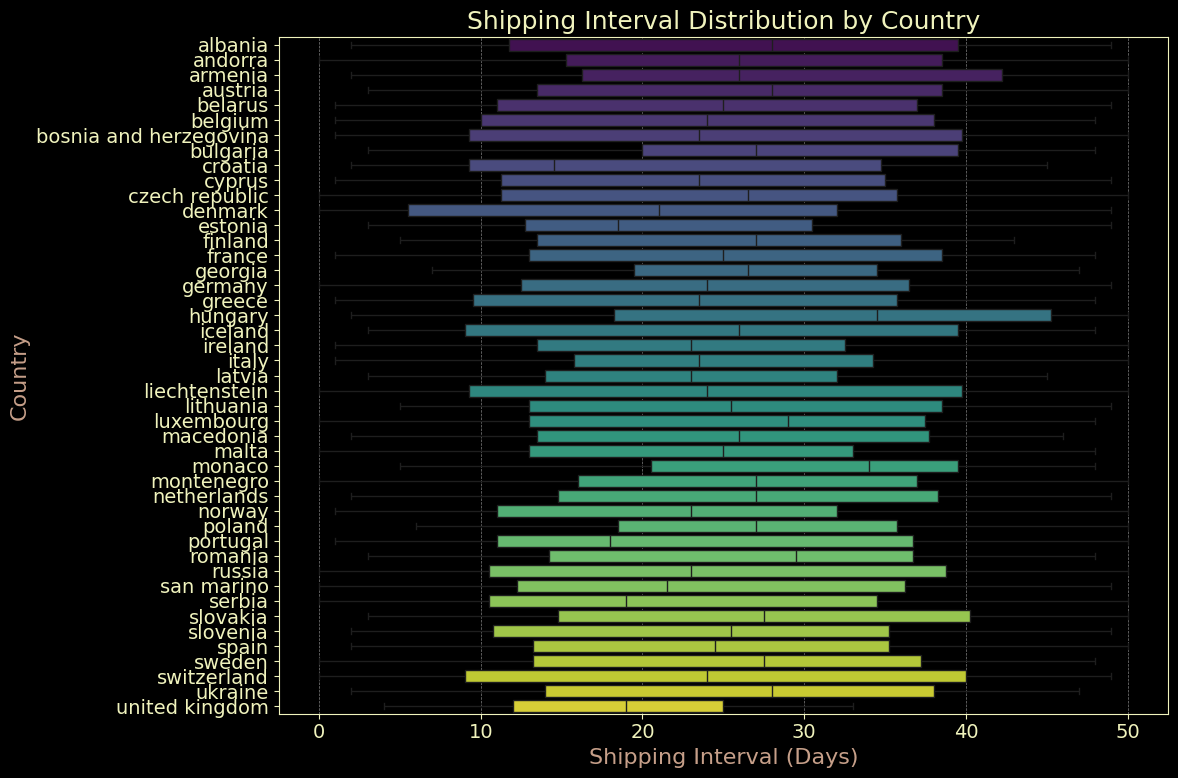

In [ ]:
ship_by_country = shiping_by_geo_filter.pivot_table(values=['revenue', 'profit'], index='name', columns='interval')
ship_by_country_long = ship_by_country.stack().reset_index()
plt.figure(figsize=(12, 8))
sns.boxplot(data=ship_by_country_long, x='interval', y='name', orient='h', showfliers=False, palette='viridis', hue='name',
    dodge=False)
plt.legend([], [], frameon=False)
plt.title('Shipping Interval Distribution by Country')
plt.xlabel('Shipping Interval (Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Переглядаємо розподіл інтервалів доставки по країнах. Бачимо 'зсуви' в ту чи іншу сторону. Приміром для Румунії сильний зсув в сторону збільшення інтервалів доставки замовлень.
Значна варіація часу доставки: Як видно з графіка, час доставки замовлень до різних країн суттєво відрізняється. Це може бути пов'язано з різними факторами, такими як відстань, митні процедури, логістичні інфраструктури тощо.
Географічні відмінності: Можна помітити, що країни, розташовані географічно ближче одна до одної, часто мають схожий час доставки. Однак, це не є абсолютним правилом, оскільки на час доставки впливає багато інших факторів.
Є кілька країн, для яких час доставки суттєво відрізняється від середнього значення. Це можуть бути як країни з дуже коротким часом доставки (можливо, завдяки розвиненій логістичній інфраструктурі), так і країни з дуже довгим часом доставки (можливо, через віддаленість або складні митні процедури).   
Висновок:   
Оскільки на гістограмі розподілу ми бачили більш-менш рівномірний розподіл інтервалів доставки і висунули гіпотезу про відсутність сезонності, то скоріше за все на інтервал доставки найсуттєвіше впливає географічний фактор.

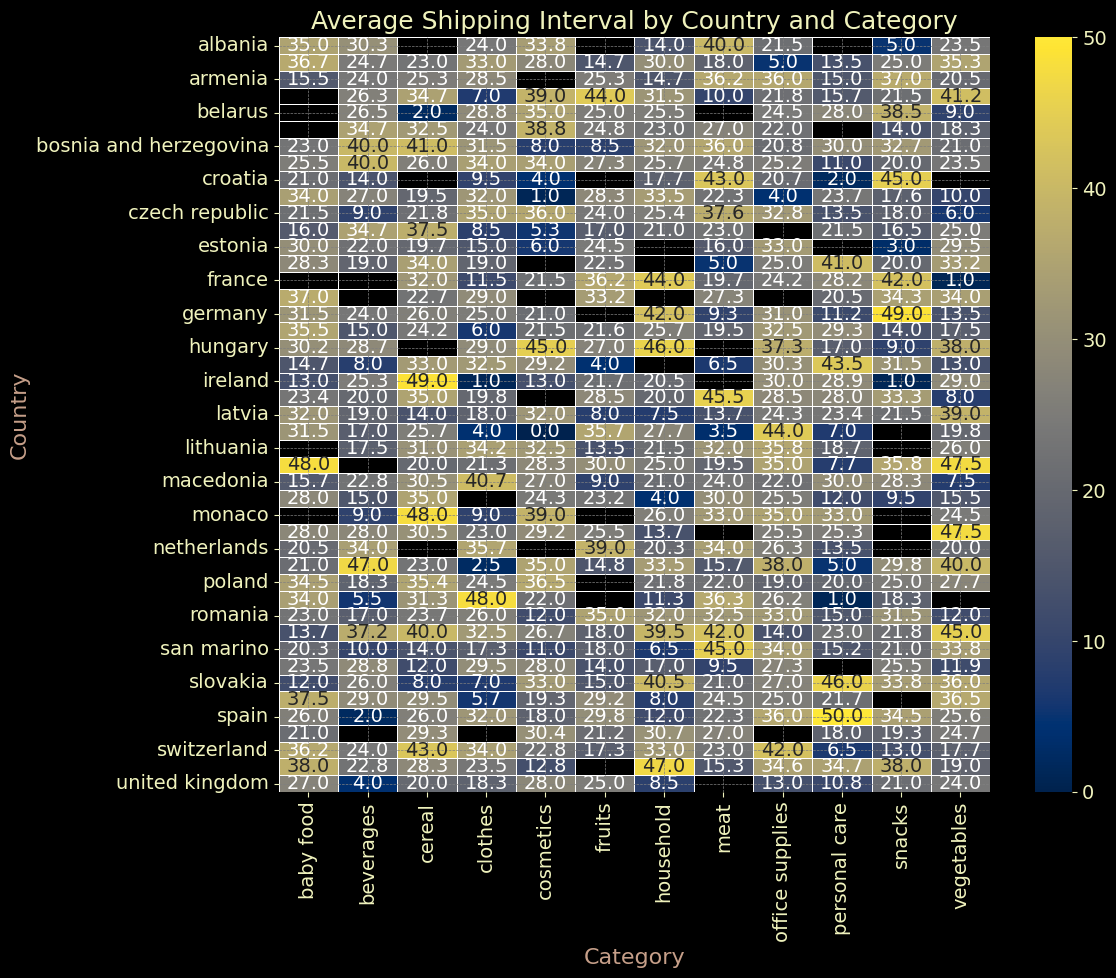

In [ ]:
ship_country_category = shiping_by_geo_filter.pivot_table(values='interval', index='name', columns='item_type', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(ship_country_category, cmap='cividis', annot=True, fmt='.1f', linewidths=0.5)

plt.title('Average Shipping Interval by Country and Category')
plt.xlabel('Category')
plt.ylabel('Country')
#plt.legend('Shiping Interval (Days)')
plt.tight_layout()
plt.show()

Теплова мапа більш детально нам демонструє розподіл інтервалів доставки, враховуючи категорії товарів, що доставлялися.    
Час доставки товарів суттєво відрізняється залежно від країни призначення та категорії товару. Це може бути пов'язано з різними факторами, такими як відстань, митні процедури, логістичні інфраструктури тощо.    
Спостерігається певна географічна залежність часу доставки. Країни, розташовані ближче один до одного, можуть мати схожі показники часу доставки. Однак, на цей показник можуть впливати й інші фактори, такі як розвиненість транспортної інфраструктури та митні правила.    
Час доставки може відрізнятися для різних категорій товарів. Наприклад, для деяких категорій товарів (наприклад, свіжих продуктів) можуть бути більш жорсткі вимоги до швидкості доставки.    
На графіку можна помітити кілька клітинок з аномально високими або низькими значеннями часу доставки. Це може свідчити про наявність певних проблем у логістичних процесах для цих конкретних комбінацій країни та категорії товару.



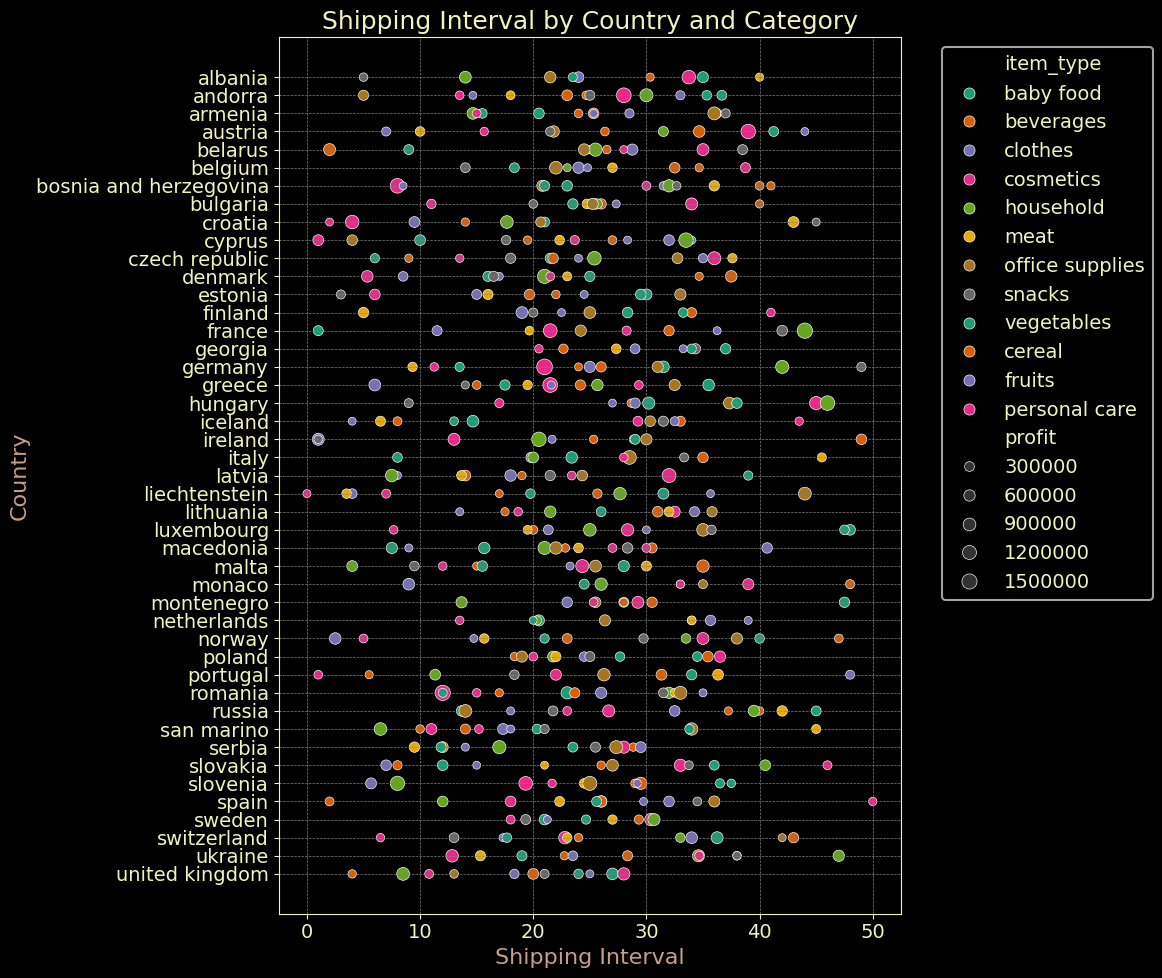

In [ ]:
ship_by_country_cat_profit = shiping_by_geo_filter.groupby(['name', 'item_type'])[['profit', 'interval']].mean().reset_index()
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=ship_by_country_cat_profit,
    x='interval',
    y='name',
    hue='item_type',
    size='profit',
    palette='Dark2',
    #legend='full'
)

plt.title('Shipping Interval by Country and Category')
plt.xlabel('Shipping Interval')
plt.ylabel('Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Розподіл товарів по країнах та категоріях нерівномірний. Деякі країни мають більше точок, ніж інші, що може вказувати на більший обсяг відвантажень або більшу різноманітність товарів.
Можна припустити, що існує певна залежність між часом доставки та категорією товару або країною призначення.

#Динамікa продажів (у часі)

##В розрізі категорій




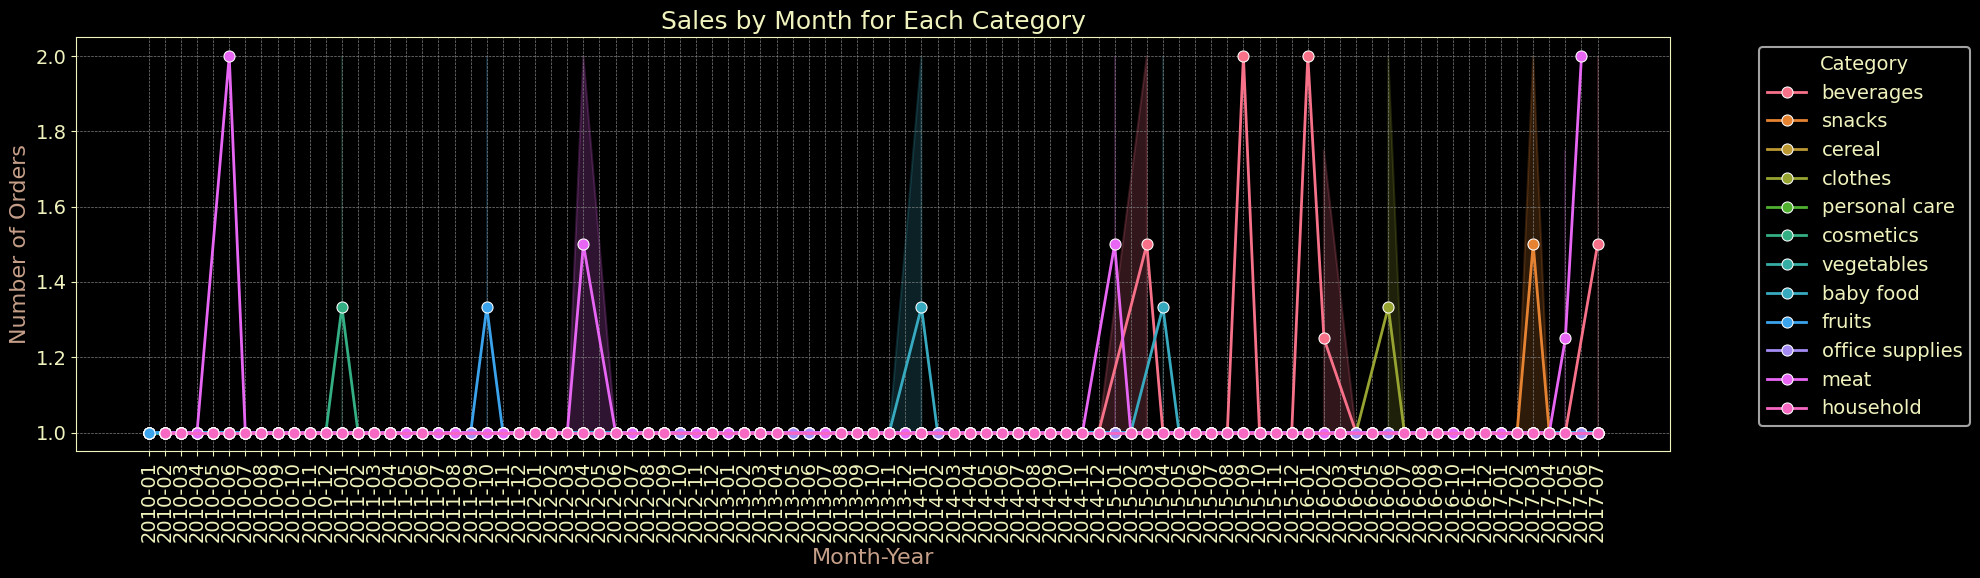

In [ ]:
sales['year'] = sales['Order Date'].dt.year
sales['month'] = sales['Order Date'].dt.month
sales_by_month = sales.groupby(['year', 'month', 'name', 'item_type'])['Order ID'].nunique().reset_index()
sales_by_month['year_month'] = sales_by_month['year'].astype(str) + '-' + sales_by_month['month'].astype(str).str.zfill(2)
plt.figure(figsize=(20, 6))

sns.lineplot(
    data=sales_by_month,
    x='year_month',
    y='Order ID',
    hue='item_type',
    marker='o'
)
plt.title('Sales by Month for Each Category')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Бачимо піки майже кожного року на початку року (можливо продажі на новорічні свята значно зростають)    
Кількість замовлень для більшості категорій демонструє значні коливання від місяця до місяця. Це може свідчити про сезонність попиту на певні товари або про вплив інших факторів (наприклад, маркетингових кампаній, свят).    
Категорії мають різні середні рівні продажів. Деякі категорії (наприклад, "Напої", "Снеки") мають більш високі показники, ніж інші ("Дитяче харчування", "Фрукти").    
Для деяких категорій спостерігається чітка сезонність. Наприклад, для категорії "Напої" можна помітити періодичні піки, що можуть бути пов'язані з літніми місяцями або святами.    
Для деяких категорій спостерігаються різкі стрибки продажів, що можуть бути пов'язані з разовими подіями (наприклад, акціями, новинками).


##В розрізі країн


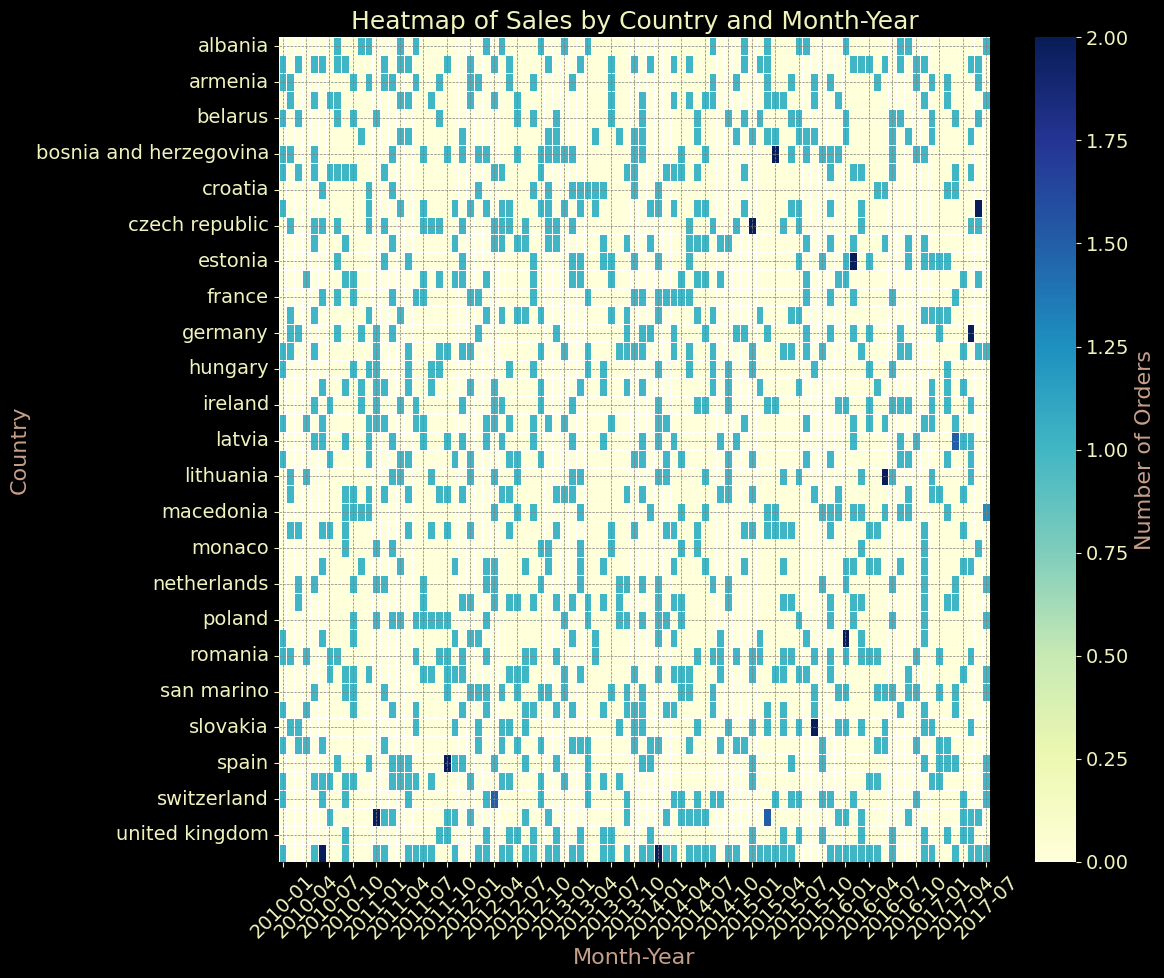

In [ ]:
heatmap_data = sales_by_month.pivot_table(values='Order ID', index='name', columns='year_month', fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot=False,
    #fmt='.0f',
    cbar_kws={'label': 'Number of Orders'}  # Підпис кольорової шкали
)
plt.title('Heatmap of Sales by Country and Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Графік свідчить про значні відмінності в обсягах продажів між різними країнами. Деякі країни демонструють стабільно високі продажі протягом усього періоду, в той час як в інших країнах спостерігаються значні коливання.    
Для багатьох країн характерна сезонність продажів. Це може бути пов'язано з різними факторами, такими як кліматичні умови, національні свята, маркетингові кампанії тощо.    
Навіть у межах однієї країни спостерігаються значні коливання продажів від місяця до місяця. Це може бути пов'язано з різними факторами, такими як економічні кризи, політичні події, зміни в споживчих перевагах.   
У деяких випадках спостерігаються різкі стрибки продажів у конкретних країнах і місяцях. Це може бути пов'язано з одноразовими подіями, такими як розпродажі, нові продукти або спеціальні пропозиції.
Можливі причини таких відмінностей:

Економічні фактори: Рівень доходу, безробіття, інфляція можуть значно впливати на купівельну спроможність населення.
Культурні особливості: Різні країни мають різні культурні традиції та споживчі звички.
Кліматичні умови: Погодні умови можуть впливати на попит на певні товари (наприклад, збільшення продажів зимового одягу в холодну пору року).
Маркетингові стратегії: Різні маркетингові кампанії та рекламні акції можуть призводити до значних коливань продажів.
Логістичні обмеження: Проблеми з доставкою або митним оформленням можуть вплинути на доступність товарів у певних країнах.

##Аналіз продажів товарів за днями тижня

In [ ]:
sales['weekday'] = sales['Order Date'].dt.day_name()
order_count = sales['Order ID'].astype(str).value_counts()
sales['order_cnt'] =  sales['Order ID'].astype(str).map(order_count).astype(int)



In [ ]:
#sales['avg_price_tag'] = sales['revenue'] / ['Units Sold']
sales_by_weekday = pd.pivot_table(sales, values=['revenue', 'cost', 'profit','order_cnt', 'Units Sold'],
                                  index='weekday', aggfunc='sum'
                                  ).reindex(
                                      ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                                      ).reset_index()
sales_by_weekday['avg_value_of_check'] = sales_by_weekday['revenue'] / sales_by_weekday['order_cnt']
sales_by_weekday.head()

,weekday,Units Sold,cost,order_cnt,profit,revenue,avg_value_of_check
0,Monday,1027424.0,1.996781e+08,201,75790330.12,2.754685e+08,1.370490e+06
1,Tuesday,863568.0,1.478865e+08,182,65637400.07,2.135239e+08,1.173208e+06
2,Wednesday,900973.0,1.888919e+08,194,72323843.38,2.612157e+08,1.346473e+06
3,Thursday,850351.0,1.505966e+08,167,64325663.17,2.149222e+08,1.286959e+06
4,Friday,866387.0,1.845725e+08,176,79234529.04,2.638070e+08,1.498903e+06


In [ ]:

sales_by_weekday_norm = normalize_data(sales_by_weekday)
sales_by_weekday_norm.head()

,weekday,Units Sold,cost,order_cnt,profit,revenue,avg_value_of_check
0,Monday,0.878260,1.000000,0.850,0.768983,1.000000,0.624140
1,Tuesday,0.065555,0.000000,0.375,0.087984,0.000000,0.046706
2,Wednesday,0.251079,0.791737,0.675,0.536471,0.769911,0.553843
3,Thursday,0.000000,0.052326,0.000,0.000000,0.022574,0.379650
4,Friday,0.079537,0.708338,0.225,1.000000,0.811743,1.000000


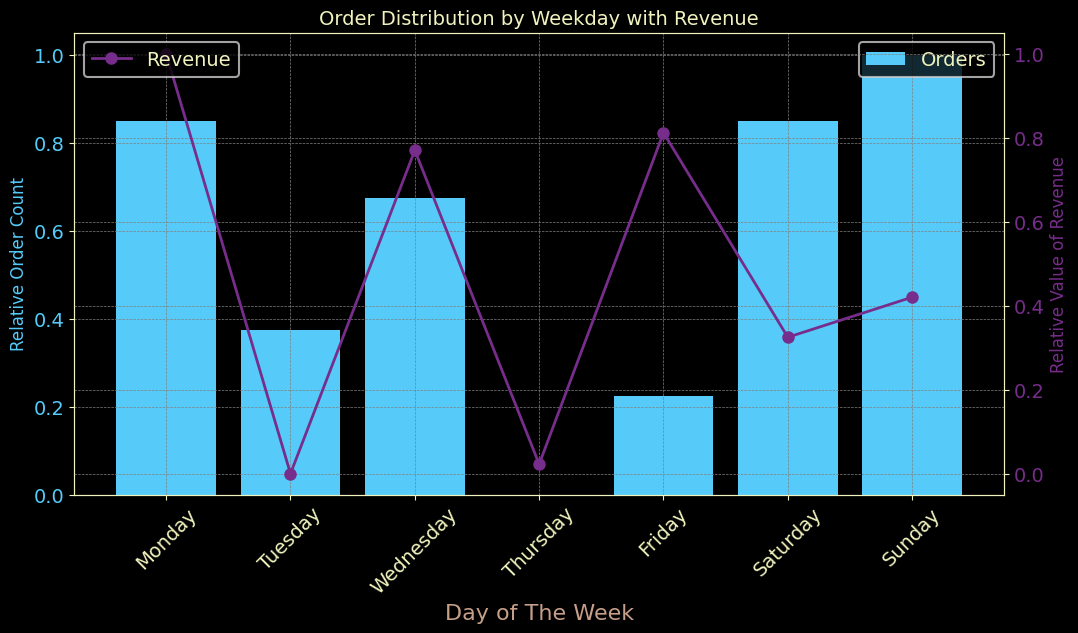

In [ ]:
fig7, ax7 = plt.subplots(figsize=(12, 6))
plt.bar(sales_by_weekday_norm['weekday'], sales_by_weekday_norm['order_cnt'], label='Orders')
#plt.title('Sales by Day of The Week'
ax7.set_xlabel('Day of The Week')
ax7.set_ylabel('Relative Order Count', color='#56CBF9', fontsize=12)
ax7.tick_params(axis='y', labelcolor='#56CBF9')
plt.xticks(rotation=45)
ax8 = ax7.twinx()  # Додаємо другу вісь
ax8.plot(sales_by_weekday_norm['weekday'], sales_by_weekday_norm['revenue'], color='#772D8B', marker='o', label='Revenue')
ax8.set_ylabel('Relative Value of Revenue', color='#772D8B', fontsize=12)
ax8.tick_params(axis='y', labelcolor='#772D8B')
plt.title('Order Distribution by Weekday with Revenue', fontsize=14)
ax7.legend(loc='upper right')
ax8.legend(loc='upper left')

plt.show()


_Найвища кількість замовлень_ cпостерігається у вихідні дні (субота, неділя), що є типовим для багатьох бізнесів, особливо роздрібної торгівлі.   
_Найнижча кількість замовлень_, як правило, у середині тижня (середа, четвер).    
Динаміка доходу дещо відрізняється від динаміки кількості замовлень. Хоча піки доходу також спостерігаються у вихідні, але є помітні відмінності за окремими днями. Наприклад, у понеділок спостерігається високий дохід при відносно невеликій кількості замовлень, що може свідчити про великі середні чеки в цей день.    
Між кількістю замовлень та доходом спостерігається _загальна позитивна кореляція_, тобто дні з більшою кількістю замовлень, як правило, мають і більший дохід. Однак, ця кореляція не є ідеальною, що свідчить про вплив інших факторів на дохід (наприклад, середній чек, структура товарів, що продаються).    
Отже дані свідчать про чітку сезонність продажів за днями тижня. Вихідні дні є найбільш активними в плані кількості замовлень.    
Аналіз співвідношення кількості замовлень та доходу дозволяє зробити висновки про структуру продажів в різні дні тижня. Наприклад, високий дохід у понеділок при невеликій кількості замовлень може свідчити про продаж дорожчих товарів або послуг на початку тижня.


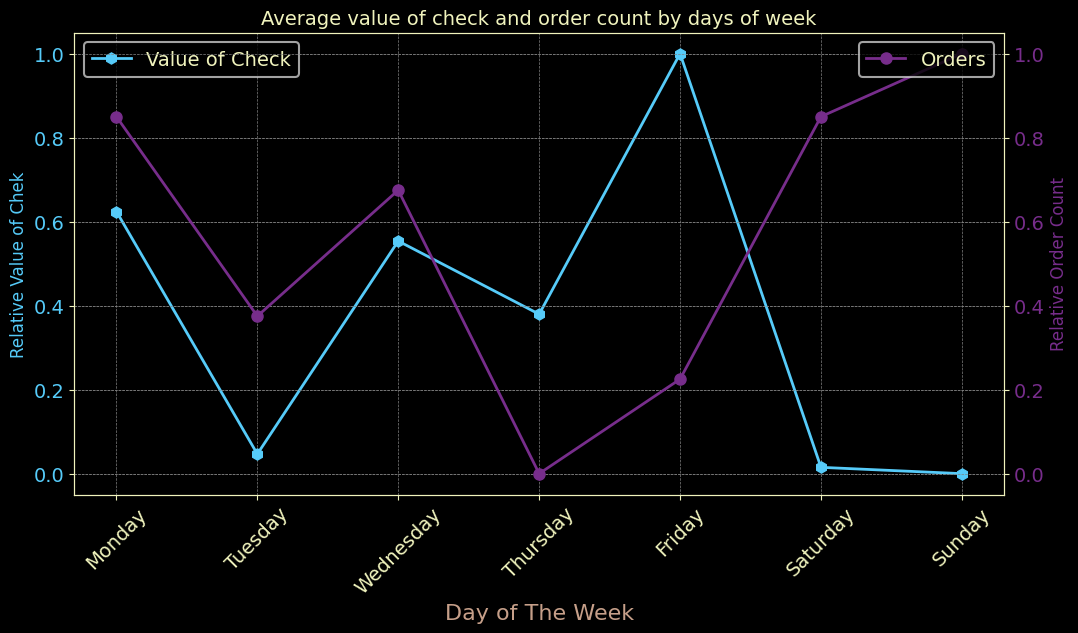

In [ ]:
fig9, ax9 = plt.subplots(figsize=(12, 6))
plt.plot(sales_by_weekday_norm['weekday'], sales_by_weekday_norm['avg_value_of_check'], color='#56CBF9', marker='h', label='Value of Check')
#plt.title('Sales by Day of The Week'
ax9.set_xlabel('Day of The Week')
ax9.set_ylabel('Relative Value of Chek', color='#56CBF9', fontsize=12)
ax9.tick_params(axis='y', labelcolor='#56CBF9')
plt.xticks(rotation=45)
ax10 = ax9.twinx()  # Додаємо другу вісь
ax10.plot(sales_by_weekday_norm['weekday'], sales_by_weekday_norm['order_cnt'], color='#772D8B', marker='o', label='Orders')
ax10.set_ylabel('Relative Order Count', color='#772D8B', fontsize=12)
ax10.tick_params(axis='y', labelcolor='#772D8B')
plt.title('Average value of check and order count by days of week', fontsize=14)
ax10.legend(loc='upper right')
ax9.legend(loc='upper left')

plt.show()

 Отже спостерігаємо підтвердження загальних трендів:    
Вихідні (субота, неділя) демонструють найвищу кількість замовлень. Це свідчить про те, що клієнти активніше здійснюють покупки у вихідні дні.
Середина тижня - мінімум замовлень.   
Незважаючи на відносно невелику кількість замовлень, у понеділок спостерігається _найвищий середній чек_. Це може свідчити про те, що в цей день клієнти здійснюють більш цільові покупки або купують дорожчі товари.   
Середній чек демонструє значні коливання протягом тижня. Це може бути пов'язано з різними факторами, такими як:
Тип товарів: У різні дні тижня можуть бути популярні різні категорії товарів з різною вартістю.
Маркетингові акції: Проведення акцій та знижок може впливати на середній чек.
Поведінка споживачів: Споживачі можуть мати різні звички покупок у різні дні тижня.   
Не спостерігається чіткої позитивної або негативної кореляції між кількістю замовлень та середнім чеком. Це означає, що дні з великою кількістю замовлень не обов'язково мають високий середній чек і навпаки.
Можливі причини: Відсутність сильної кореляції може бути пов'язана з різними факторами, такими як сезонність, маркетингові кампанії, а також специфікою товарів та послуг, що пропонуються.

#Підсумки:
* Популярність категорій: Найбільша кількість замовлень припадає на "Офісні припаси", "Напої" та "Овочі", що свідчить про їх високий попит. Найменш популярними є "Домашнє господарство" та "Зернові".

* Ефективність замовлень: Категорії "Офісні припаси" та "Косметика" демонструють високу ефективність, адже обсяги товарів на одне замовлення найбільші. Натомість "Зернові" та "Напої" мають низьку ефективність.

* Дохід і прибуток: Основні драйвери доходу — "Офісні припаси" та "Домашнє господарство", тоді як найбільший прибуток забезпечує категорія "Косметика" завдяки високій маржинальності.

* Регіональні відмінності: Найбільший дохід приносять Чехія та Україна, але прибуток залишається значно нижчим за дохід, що вказує на потребу оптимізації витрат у різних країнах.

* Інтервали доставки: Середній дохід коливається залежно від часу доставки. Для Азії короткі інтервали пов'язані з вищою дохідністю, тоді як у Європі дохід зростає з тривалістю інтервалу.

* Сезонність: Помітні піки замовлень на початку року та для певних категорій (наприклад, "Напої") влітку або під час свят.

* Особливості країн: Суттєві коливання обсягів продажів і часу доставки залежать від економічних, культурних, логістичних та кліматичних факторів.

* Динаміка продажів: Найвища активність замовлень спостерігається у вихідні дні, тоді як середина тижня демонструє зниження.

* Географічний вплив: Час доставки та дохід значно відрізняються між країнами через відстань, інфраструктуру та митні особливості.

* Загальна стабільність: Дані свідчать про відсутність різких збоїв у доставці, але є необхідність у подальшій оптимізації логістики й стратегії на ринках з нижчою маржинальністю.

##Рекомендації для покращення бізнес-показників:

**Оптимізація логістики:**

Скоротити час доставки для регіонів із високим доходом (наприклад, Азія), щоб підвищити задоволеність клієнтів.
Покращити логістичні процеси в країнах із високими витратами на доставку (наприклад, Європа), щоб знизити операційні витрати.
Фокус на ефективні категорії:

Розширити асортимент та просування категорій із високою маржинальністю, таких як "Косметика".
Зменшити витрати на низькоефективні категорії, як-от "Зернові" чи "Домашнє господарство".    

**Сезонне планування:**

Підготувати маркетингові кампанії для сезонних піків продажів: літні акції для "Напоїв" та святкові пропозиції для інших популярних товарів.
Збільшити запаси у періоди високого попиту, щоб уникнути нестачі товарів.
Географічна стратегія:

Активніше просувати бізнес у країнах із стабільним попитом і високим доходом, таких як Чехія та Україна.
Провести аналіз причин низької маржинальності в певних країнах та оптимізувати витрати.    

**Розвиток категорій з потенціалом:**

Стимулювати продаж "Овочів" та "Офісних приладів" через спеціальні пропозиції чи знижки, враховуючи їхню популярність серед клієнтів.
